1. To join the zoning layer to the cadastral lot boundaries, follow these steps:

 (in ArcPro) Analysis>Spatial Join tool
- In the dialogue box, make sure you select one-to-many under Join Operation and 'intersect' as the Match Option. 
- Click the Fields dropdown button and select ZONECLASS
- Under the Source tab go to Merge Rule and select 'Join'. 
- Under the Properties tab choose Text for type and give it an appropriate length (100)
- Click Run

This will produce a spatial join where zoning attributes have been joined to city lots. Lots with multiple zoning classifications will be preserved in the ZONECLASS column, which now has all zoning classifications separated by a comma:
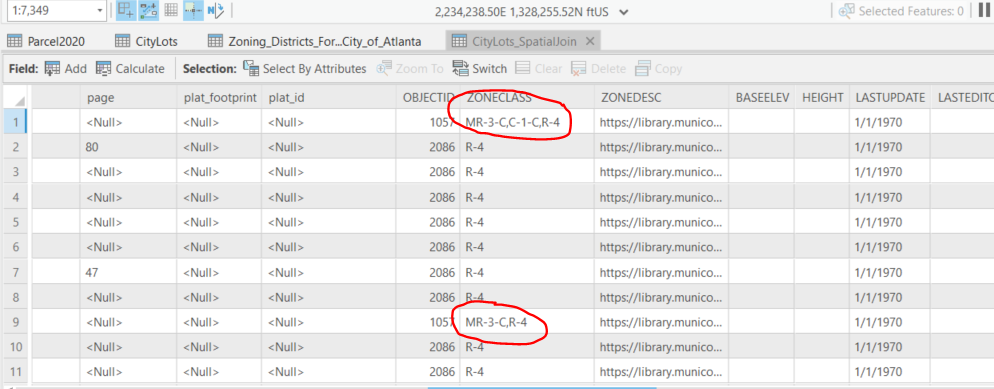
    
    

2. Use the `count` function to create check and see how many new columns you will need.

Rather than manually checking the ZONECLASS column to see which lot has the most distinct zoning classifications, just 
- Add Field called count
- In the Field Calculator, enter `ZONECLASS.count(",")` in the expression box. 

This will populate the column with the number of commas. If there are 5 commas in the ZONECLASS row, then that means there are 6 different zoning attributes. 

Check and see what the highest number is and create that many new columns. The first iteration of this layer had up to 13 commas, so we needed Zoning1-Zoning14 columns.

3.  Add new columns for each zoning classification. Working in the attribute table Field Calculator

The next step is to take the zoning classifications in the ZONECLASS field and separate them out into new columns. There is already a column called ZONING that contains the first zoning classification. You do not need to do anything here. You can rename it Zoning1 if you want.

- In the attribute table, select 'Add Field'. Create multiple new fields at once, call them Zoning 2, etc. 

- Use the Field Calculator on Zoning 2.

Field Calculator expression: 
`calc(!ZONECLASS!)`

Code Block:

`def calc(ZONECLASS):
    if ZONECLASS.count(",") >= 1:
        return ZONECLASS.split(",")[1]
    elif ZONECLASS.count(",") < 1: 
        return " "`

**Translation

`def calc(ZONECLASS):` 
Function is taking information from ZONECLASS and doing something with it

    `if ZONECLASS.count(",") >= 1:` 
`If` you `count` the number of commas in ZONECLASS and find one or more...


            `return ZONECLASS.split(",")[1]` 
then you will look for that comma `(",")` and `split` the second word in the column (remember that in python indexes start with 0. So, 1 is actually the 2nd word since 0 is the first.)


    `elif ZONECLASS.count(",") < 1:` 
        return " "`
else if `elif` if you don't find one or more commas, just return a blank space into the column. 


3. Repeat step 2 for all the zoning columns you need. Modify the code block thusly:
    
    Zoning 3
    `def calc(ZONECLASS):
    if ZONECLASS.count(",") >= 2:
        return ZONECLASS.split(",")[2]
    elif ZONECLASS.count(",") < 2: 
        return " "`